In [1]:
import numpy as np
import pandas as pd
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [2]:
df_slider_features = pd.read_csv("Features/df_slider_feature.csv")
df_slider_features.head()

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,0.296876,0.928293,0.426360,0.173016,0.000017,0.149215,0.002930,0.014925,-428.616608,76.084007,...,0.017603,0.006328,0.002205,0.010807,0.006736,0.002476,0.026855,0.174316,0.092254,0.031273
1,0.362463,0.954619,0.474907,0.160585,0.000019,0.152808,0.003000,0.015272,-417.707153,77.048637,...,0.017927,0.006483,0.002310,0.011115,0.006806,0.002550,0.037109,0.168457,0.094953,0.028182
2,0.310469,0.932935,0.449223,0.170239,0.000020,0.153702,0.003041,0.015381,-419.471252,77.015129,...,0.017650,0.006445,0.002324,0.011017,0.006826,0.002560,0.039551,0.173340,0.093624,0.027552
3,0.366559,0.946908,0.472160,0.158169,0.000021,0.148869,0.002892,0.014871,-416.387299,73.255180,...,0.017413,0.006507,0.002199,0.011117,0.006719,0.002537,0.056152,0.167480,0.097751,0.026171
4,0.303868,0.936774,0.427346,0.174147,0.000009,0.149356,0.002760,0.014906,-427.758545,60.369072,...,0.017726,0.006445,0.002024,0.010983,0.006745,0.002491,0.055664,0.179688,0.104519,0.024632


In [3]:
df_slider_target = pd.read_csv("Features/df_slider_target.csv")
df_slider_target.tail()

,0
12277,1
12278,1
12279,1
12280,1
12281,1


In [4]:
X = df_slider_features
y = df_slider_target.values.ravel()

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2, 
    random_state=69
)

In [6]:
from sklearn.ensemble import RandomForestClassifier
####### Default Random Forest ########
model = RandomForestClassifier(
    random_state=69
)

model.fit(X_train, y_train)

print(f'Default Random Forest Model\'s accuracy on training set is {100*model.score(X_train, y_train):.2f}%')
print(f'Default Random Forest Model\'s accuracy on test set is {100*model.score(X_test, y_test):.2f}%\n')


########## Tuned Random Forest #######
model = RandomForestClassifier(
    n_estimators = 500, 
    criterion ='entropy',
    warm_start = True,
    max_features = 'sqrt',
    oob_score = 'True', # more on this below
    random_state=69  
) 

model.fit(X_train, y_train)

print(f'Random Forest Model\'s accuracy on training set is {100*model.score(X_train, y_train):.2f}%')
print(f'Random Forest Model\'s accuracy on test set is {100*model.score(X_test, y_test):.2f}%')

Default Random Forest Model's accuracy on training set is 100.00%
Default Random Forest Model's accuracy on test set is 95.85%

Random Forest Model's accuracy on training set is 100.00%
Random Forest Model's accuracy on test set is 96.05%


In [7]:
from sklearn.metrics import classification_report
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.84      0.90       518
           1       0.96      0.99      0.98      1939

    accuracy                           0.96      2457
   macro avg       0.96      0.92      0.94      2457
weighted avg       0.96      0.96      0.96      2457



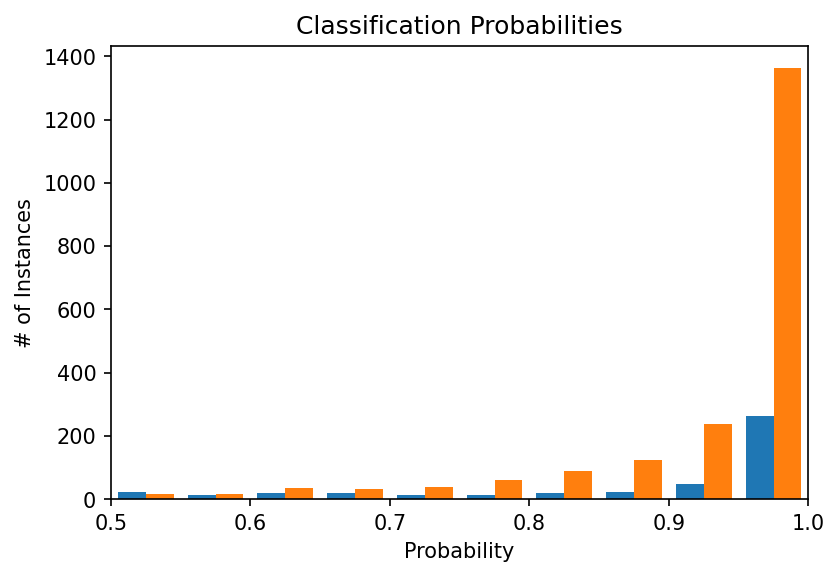

In [8]:
# predict probabilities
probas = model.predict_proba(X_test)

# plot
plt.figure(dpi=150)
plt.hist(probas, bins=20)
plt.title('Classification Probabilities')
plt.xlabel('Probability')
plt.ylabel('# of Instances')
plt.xlim([0.5, 1.0])
plt.show()

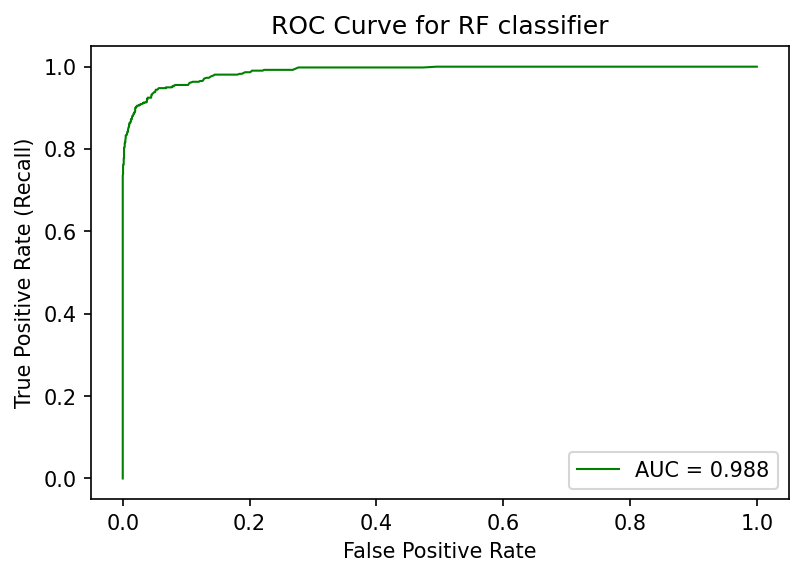

In [9]:
from sklearn.metrics import roc_curve, auc
# get false and true positive rates
fpr, tpr, thresholds = roc_curve(y_test, probas[:,0], pos_label=0)
# get area under the curve
roc_auc = auc(fpr, tpr)
# PLOT ROC curve
plt.figure(dpi=150)
plt.plot(fpr, tpr, lw=1, color='green', label=f'AUC = {roc_auc:.3f}')
plt.title('ROC Curve for RF classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.legend()
plt.show()

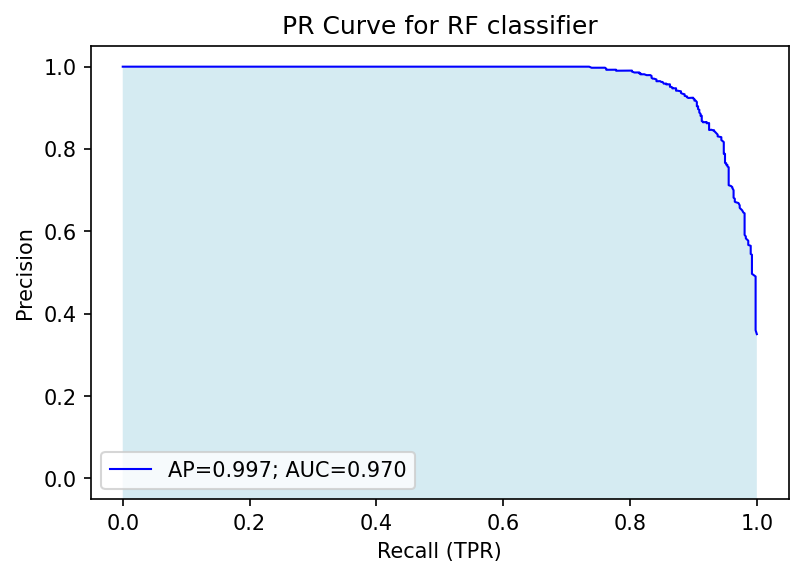

In [10]:
from sklearn.metrics import precision_recall_curve, average_precision_score, auc
# get precision and recall values
precision, recall, thresholds = precision_recall_curve(y_test, probas[:,0], pos_label=0)
# average precision score
avg_precision = average_precision_score(y_test, probas[:,1])
# precision auc
pr_auc = auc(recall, precision)
# plot
plt.figure(dpi=150)
plt.plot(recall, precision, lw=1, color='blue', label=f'AP={avg_precision:.3f}; AUC={pr_auc:.3f}')
plt.fill_between(recall, precision, -1, facecolor='lightblue', alpha=0.5)
plt.title('PR Curve for RF classifier')
plt.xlabel('Recall (TPR)')
plt.ylabel('Precision')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.legend()
plt.show()